<a href="https://colab.research.google.com/github/Royshim/data-science-cat-2/blob/main/data_science_cat_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import random
from deap import base, creator, tools
from tabulate import tabulate


In [55]:
# Load dataset
file_path = "/content/student_performance_data.csv"
df = pd.read_csv(file_path)

# first 30 rows
print("\n FIRST 30 STUDENT RECORDS \n")
print(tabulate(df.head(30), headers='keys', tablefmt='fancy_grid'))



 FIRST 30 STUDENT RECORDS 

╒════╤══════════════╤═══════╤════════════╤═════════════╤═══════╤═════════════╤═════════════════╤══════════════════╤═══════════════════╤═══════════════════════╤══════════════════════╕
│    │   Student_ID │   Age │ Gender     │ Ethnicity   │   GPA │   SAT_Score │ Financial_Aid   │ Major            │   Attendance_Rate │   Work_Hours_Per_Week │   Enrolled_Next_Year │
╞════╪══════════════╪═══════╪════════════╪═════════════╪═══════╪═════════════╪═════════════════╪══════════════════╪═══════════════════╪═══════════════════════╪══════════════════════╡
│  0 │            0 │    24 │ Male       │ Asian       │  3.56 │         820 │ nan             │ Engineering      │              0.66 │                    10 │                    0 │
├────┼──────────────┼───────┼────────────┼─────────────┼───────┼─────────────┼─────────────────┼──────────────────┼───────────────────┼───────────────────────┼──────────────────────┤
│  1 │            1 │    25 │ Male       │ Hispanic    │

DATA **PREPROCESSING**


In [56]:
# Print dataset columns to check available ones
print("Dataset Columns:", df.columns)

# Convert specific columns to categorical
categorical_cols = ['Gender', 'Ethnicity', 'Financial_Aid', 'Major']  # Update with actual categorical column names
for col in categorical_cols:
    df[col] = df[col].astype(str)  # Ensure they are treated as categorical

# Automatically detect categorical columns
detected_categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

if not detected_categorical_cols:
    raise ValueError("No categorical columns found! Please check dataset column names.")

print(f"Categorical Columns Found: {detected_categorical_cols}")

# Encode categorical variables
le = LabelEncoder()
for col in detected_categorical_cols:
    df[col] = le.fit_transform(df[col])

# Define target variable
target_col = 'Enrolled_Next_Year'  # Ensure this matches the dataset column
if target_col not in df.columns:
    raise ValueError(f"The dataset must contain '{target_col}' as the target variable.")

y = df[target_col]

# Define numerical features
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols.remove(target_col)  # Remove target variable

# Final feature list (numerical + categorical)
features = numerical_cols + detected_categorical_cols
X = df[features]

# Privacy protection
def protect_privacy(data, columns):
    protected_df = data.copy()
    for col in columns:
        noise = np.random.normal(0, 0.01 * protected_df[col].std(), len(protected_df))
        protected_df[col] = protected_df[col] + noise
    return protected_df

df = protect_privacy(df, numerical_cols)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data Preprocessing Completed!")
print(f"Final Features Used: {features}")


Dataset Columns: Index(['Student_ID', 'Age', 'Gender', 'Ethnicity', 'GPA', 'SAT_Score',
       'Financial_Aid', 'Major', 'Attendance_Rate', 'Work_Hours_Per_Week',
       'Enrolled_Next_Year'],
      dtype='object')
Categorical Columns Found: ['Gender', 'Ethnicity', 'Financial_Aid', 'Major']
Data Preprocessing Completed!
Final Features Used: ['Student_ID', 'Age', 'Gender', 'Ethnicity', 'GPA', 'SAT_Score', 'Financial_Aid', 'Major', 'Attendance_Rate', 'Work_Hours_Per_Week', 'Gender', 'Ethnicity', 'Financial_Aid', 'Major']


**DATA** **SCALING**

In [29]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data Scaling Completed!")


Data Scaling Completed!


**MODEL** **TRAINING**

In [30]:
# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=5, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = rf_model.predict(X_test_scaled)

# Evaluate model
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 0.51

Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.50      0.52       108
           1       0.47      0.52      0.49        92

    accuracy                           0.51       200
   macro avg       0.51      0.51      0.51       200
weighted avg       0.51      0.51      0.51       200



FEATURE IMPORTANCE AND VISUALIZATION

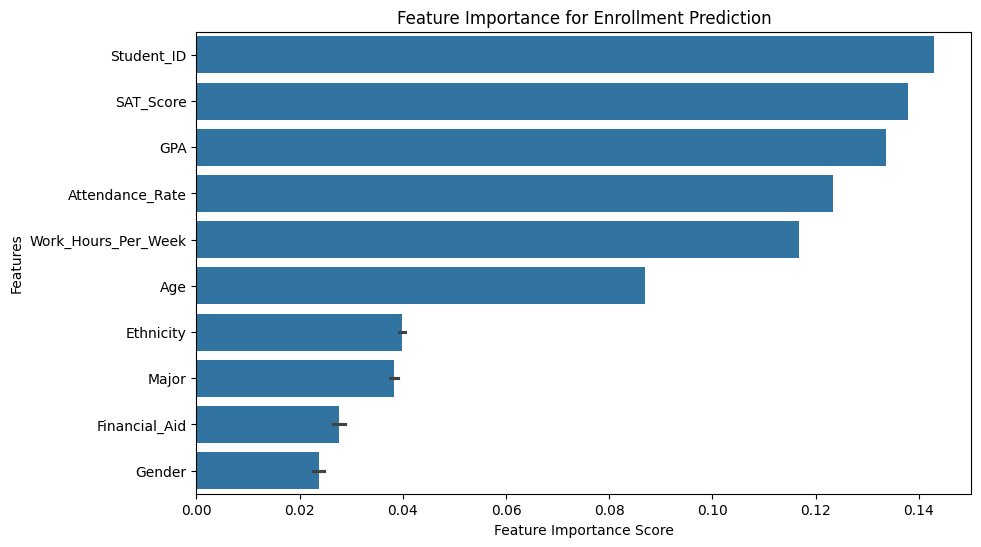


Feature Importance:
                Feature  Importance
0            Student_ID    0.143029
5             SAT_Score    0.137844
4                   GPA    0.133560
8       Attendance_Rate    0.123279
9   Work_Hours_Per_Week    0.116740
1                   Age    0.086862
11            Ethnicity    0.040403
3             Ethnicity    0.039169
7                 Major    0.039062
13                Major    0.037438
12        Financial_Aid    0.028821
6         Financial_Aid    0.026454
10               Gender    0.024706
2                Gender    0.022633


In [43]:
 # feature importance with correct mapping
feature_importance = pd.DataFrame({
    'Feature': X.columns,  # Ensure features align with the original column names
    'Importance': rf_model.feature_importances_
})

# Sort by importance
feature_importance = feature_importance.sort_values('Importance', ascending=False)

# Display feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance for Enrollment Prediction")
plt.show()

# Print the feature importance values
print("\nFeature Importance:")
print(feature_importance)


**PREDICTIONS**

In [57]:




# Define required features
features = ['Age', 'Gender', 'Ethnicity', 'GPA', 'SAT_Score',
            'Financial_Aid', 'Major', 'Attendance_Rate', 'Work_Hours_Per_Week']

# Ensure all features are present
missing_features = [col for col in features if col not in df.columns]
if missing_features:
    raise KeyError(f"Missing features from dataset: {missing_features}")

# Encode categorical variables
df_encoded = pd.get_dummies(df[features], drop_first=True)

# Align features manually instead of using feature_names_in_
expected_features = list(rf_model.feature_importances_)  # Get features from trained model
df_encoded = df_encoded.reindex(columns=expected_features, fill_value=0)

# Scale numerical features
df_scaled = scaler.transform(df_encoded)

# Make predictions
predictions = rf_model.predict(df_scaled)
probabilities = rf_model.predict_proba(df_scaled)[:, 1]

# Create table of results
results = df[['Student_ID']].copy()
results['Enrollment_Probability (%)'] = (probabilities * 100).round(1)
results['Prediction'] = ["Likely to Enroll" if pred == 1 else "May Not Enroll" for pred in predictions]

# Show table
print("\nPredictions Table:")
print(results.head(20).to_string(index=False))  # Show first 20 results

# Save to CSV
results.to_csv("student_enrollment_predictions.csv", index=False)
print("\nPredictions saved to 'student_enrollment_predictions.csv'")



Predictions Table:
 Student_ID  Enrollment_Probability (%)     Prediction
   2.107657                        46.0 May Not Enroll
  -4.598317                        46.0 May Not Enroll
   3.535935                        46.0 May Not Enroll
   5.886231                        46.0 May Not Enroll
   7.087167                        46.0 May Not Enroll
   4.233774                        46.0 May Not Enroll
   5.781544                        46.0 May Not Enroll
   6.970424                        46.0 May Not Enroll
   7.343638                        46.0 May Not Enroll
   5.592667                        46.0 May Not Enroll
   7.250184                        46.0 May Not Enroll
  12.368998                        46.0 May Not Enroll
  11.182524                        46.0 May Not Enroll
  12.912823                        46.0 May Not Enroll
  16.776433                        46.0 May Not Enroll
  14.842222                        46.0 May Not Enroll
  12.322929                        46.0 May N

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
